In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import seaborn as sns

In [3]:
#Print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactive="all"

In [3]:
#Load dataset
iris=sns.load_dataset('iris')
#Head: only the first five rows
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
#Separe features and target
x_train = iris.drop('species',axis=1)
y_train = iris['species']
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Build clusters
from sklearn.cluster import KMeans
num_clusters = 3
clusters = KMeans(num_clusters)
clusters.fit(x_train)

KMeans(n_clusters=3)

In [6]:
print(clusters)

KMeans(n_clusters=3)


In [6]:
#Build clusters
from sklearn.cluster import KMeans
num_of_clusters = range(2,11)
#SSE
error=[]

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(x_train)
    error.append(clusters.inertia_/100)
df = pd.DataFrame({"Cluster_Numbers": num_of_clusters, "Error_Term":error})
df

,Cluster_Numbers,Error_Term
0,2,1.523480
1,3,0.788514
2,4,0.572285
3,5,0.464462
4,6,0.392262
5,7,0.342982
6,8,0.300144
7,9,0.281326
8,10,0.263214


KMeans(n_clusters=3, n_init=3, verbose=1)

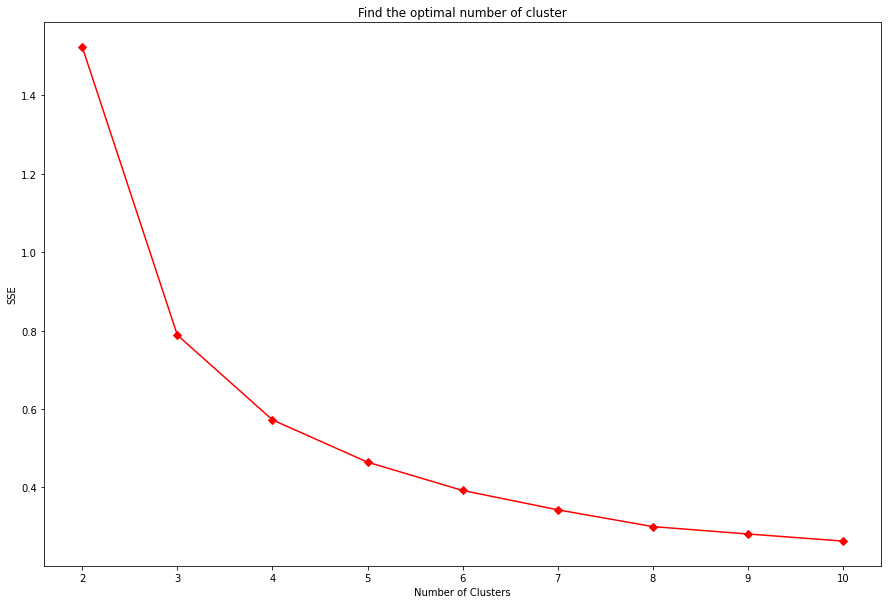

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of cluster')
plt.show()

In [23]:
#Build with 3 clusters
#Verbose mostra a quantidade de iterações executadas nas diferentes inicializações (n-init) do centroide para um mesmo numero
#cluster. A inicialização que apresentou o melhor valor de inertia é a escolhida.
clusters = KMeans(n_clusters=3,n_init=10,verbose=1)
clusters.fit(x_train)
clusters.labels_

Initialization complete
Iteration 0, inertia 94.55000000000001
Iteration 1, inertia 78.851441426146
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 143.21000000000004
Iteration 1, inertia 78.851441426146
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 150.29000000000008
Iteration 1, inertia 78.851441426146
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 109.25000000000003
Iteration 1, inertia 78.851441426146
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 107.33000000000004
Iteration 1, inertia 78.851441426146
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 158.66000000000003
Iteration 1, inertia 80.1679899668245
Iteration 2, inertia 78.851441426146
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 115.80999999999999
Iteration 1, iner

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [12]:
x_train['Cluster'] = clusters.labels_
print(x_train.head())
print(x_train['Cluster'])

   sepal_length  sepal_width  petal_length  petal_width  Cluster
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1
0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: Cluster, Length: 150, dtype: int32


In [13]:
x_train.groupby("Cluster").size()

Cluster
0    62
1    50
2    38
dtype: int64

In [10]:
clust_profile = pd.pivot_table(x_train, values=['sepal_length','sepal_width','petal_width','petal_length'],index='Cluster',aggfunc=np.mean)
np.round(clust_profile,2)

,petal_length,petal_width,sepal_length,sepal_width
Cluster,,,,
0,1.46,0.25,5.01,3.43
1,4.39,1.43,5.90,2.75
2,5.74,2.07,6.85,3.07


In [21]:
#Applying kmeans to the dataset / Creating the kmeans classifier
#random_state is the seed used by the random number generator.
#If random_state is None, the random number generator is the RandomState instance used by np.random.
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 5)
y_kmeans = kmeans.fit_predict(x_train)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [12]:
#Convert the x_train dataframe to a numpy array
x_train_arr = x_train.values
print(type(x_train_arr))

<class 'numpy.ndarray'>


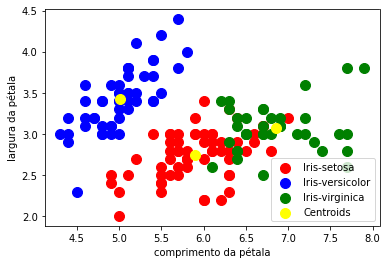

In [13]:
#Visualising the clusters
plt.scatter(x_train_arr[y_kmeans == 0, 0], x_train_arr[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x_train_arr[y_kmeans == 1, 0], x_train_arr[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x_train_arr[y_kmeans == 2, 0], x_train_arr[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("comprimento da pétala")
plt.ylabel("largura da pétala")

plt.legend()
plt.show()